In [1]:
import matplotlib.pyplot as plt
import torch

from gorl.env.env_2players_naive_torus import *
from gorl.patterns.gliders import gliders
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 10, 20

In [2]:
sandbox = NaiveSandbox(grid_size=(100,100))

In [3]:
import numpy as np

In [4]:
d = np.zeros((100,100), dtype=np.int8)

In [7]:
agents_action = torch.tensor(gliders['glider']())
x = 0
y = 0

In [8]:
agents_action

tensor([[0, 0, 1],
        [1, 0, 1],
        [0, 1, 1]])

In [9]:
np.full(2,2).data

In [10]:
type(np.random.randint(0, 3, size=(2,2)))

numpy.ndarray

In [11]:
# dummy reward_f
def reward_f(x): return 0.
env_state = sandbox.forward(inserted_block=agents_action, inserted_block_position_x0=x, 
                            inserted_block_position_y0=y, reward_fn=reward_f)

In [12]:
# plt.imshow(env_state['grid'])

In [15]:
sandbox.insert_block(gliders['gosper_glider_gun'](), 50, 50)

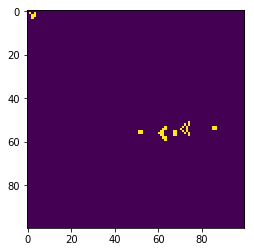

In [16]:
sandbox.step(40)
plt.imshow(sandbox.get_grid())

In [17]:
import torch


In [18]:
players_cells_values = {'player_1': 1, 'player_2': 2}
alive_cell_values = set(players_cells_values.values())
dead_cell = 0


In [19]:
def __count_neighbors(__grid, i, j, g_len, value):
    neighbors_value = [__grid[i, (j - 1) % g_len],
                       __grid[i, (j + 1) % g_len],
                       __grid[(i - 1) % g_len, j],
                       __grid[(i + 1) % g_len, j],
                       __grid[(i - 1) % g_len, (j - 1) % g_len],
                       __grid[(i - 1) % g_len, (j + 1) % g_len],
                       __grid[(i + 1) % g_len, (j - 1) % g_len],
                       __grid[(i + 1) % g_len, (j + 1) % g_len]]
    return sum([k == value for k in neighbors_value])

In [20]:
def step(__grid, __alive_cell, n_steps=1):
    for i in range(n_steps):
        new_grid = __grid.copy()
        g_len = len(new_grid)

        for i in range(g_len):
            for j in range(g_len):
                p1_total = __count_neighbors(__grid, i, j, g_len, value=players_cells_values['player_1'])
                p2_total = __count_neighbors(__grid, i, j, g_len, value=players_cells_values['player_2'])
                total = p1_total + p2_total

                if __grid[i, j] in __alive_cell:
                    if (total < 2) or (total > 3):
                        new_grid[i, j] = self.__dead_cell
                else:
                    if total == 3:
                        if p1_total > p2_total:
                            new_grid[i, j] = players_cells_values['player_1']
                        elif p2_total > p1_total:
                            new_grid[i, j] = players_cells_values['player_2']
                        else:
                            new_grid[i, j] = random.choice(list(__alive_cell))

        __grid[:] = new_grid[:]
#         __current_iteration += 1
        return __grid

In [21]:
__grid = np.full((10,10), dead_cell)

In [22]:
len(__grid)

10

In [23]:
t_grid = torch.zeros((10,10))

In [24]:
t_grid

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [25]:
step(__grid, __alive_cell=alive_cell_values, n_steps=1)

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [26]:
# step(t_grid, __alive_cell=alive_cell_values, n_steps=1)

In [27]:
def step_t(__grid, __alive_cell, n_steps=1):
    for i in range(n_steps):
        
        new_grid = __grid
        g_len = len(new_grid)

        for i in range(g_len):
            for j in range(g_len):
                p1_total = __count_neighbors(__grid, i, j, g_len, value=players_cells_values['player_1'])
                p2_total = __count_neighbors(__grid, i, j, g_len, value=players_cells_values['player_2'])
                total = p1_total + p2_total

                if __grid[i, j] in __alive_cell:
                    if (total < 2) or (total > 3):
                        new_grid[i, j] = self.__dead_cell
                else:
                    if total == 3:
                        if p1_total > p2_total:
                            new_grid[i, j] = players_cells_values['player_1']
                        elif p2_total > p1_total:
                            new_grid[i, j] = players_cells_values['player_2']
                        else:
                            new_grid[i, j] = random.choice(list(__alive_cell))

        __grid[:] = new_grid[:]
#         __current_iteration += 1
        return __grid

In [28]:
n_t_grid = t_grid

In [29]:
gt_len = len(n_t_grid)


In [30]:
n_t_grid

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])